<a href="https://colab.research.google.com/github/celso-rojas/SSF-Oto24-CelsoRojasPerez/blob/main/tareaSSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Metodo Simple

In [ ]:
def poly_naive(A, x):
    p = 0
    for i, a in enumerate(A):
        p += (x ** i) * a
    return p

A = [2, 4, -3]
x= 10
resultado = poly_naive(A, x)
print(resultado)

-258


# Metodo iterativo


In [ ]:
def poly_iter(A, x):
    p = 0
    xn = 1
    for a in A:
        p += xn * a
        xn *= x
    return p
A = [-4, 7, -3]
x= 4
resultado = poly_naive(A, x)
print(resultado)


-24


## Metodo Horner

In [ ]:
def poly_horner(A, x):
    p = A[-1]
    i = len(A) - 2
    while i >= 0:
        p = p * x + A[i]
        i -= 1
    return p

A = [-9, 8, -3,35]
x= 2
resultado = poly_naive(A, x)
print(resultado)


275


# Cálculo de la Serie Directa del cos(x)

In [ ]:
import math

def cos_direct_series(x, N):
    suma = 0
    for n in range(N):
        term = ((-1)**n) * (x**(2*n)) / math.factorial(2*n)
        suma += term
    return suma
x = math.radians(1)
N = 60
resultado = cos_direct_series(x, N)
cos_real = math.cos(x)
print(resultado)
print(cos_real)

0.9998476951563912
0.9998476951563913


## Cálculo computacional parcial del cos(x)

In [ ]:
def cos_partial_computation(x, tol=1e-8):
    suma = 0
    term = 1  # Primer término de la serie
    n = 0
    while abs(term) > tol:
        suma += term
        n += 1
        term = ((-1)**n) * (x**(2*n)) / math.factorial(2*n)
    return suma, n

x = math.radians(45)
resultado = cos_partial_computation(x, tol=1e-4)
print(resultado)

(0.7071032148228457, 4)


# Evaluación de cos(x) mediante  el cálculo de la serie directa y  computación parcial

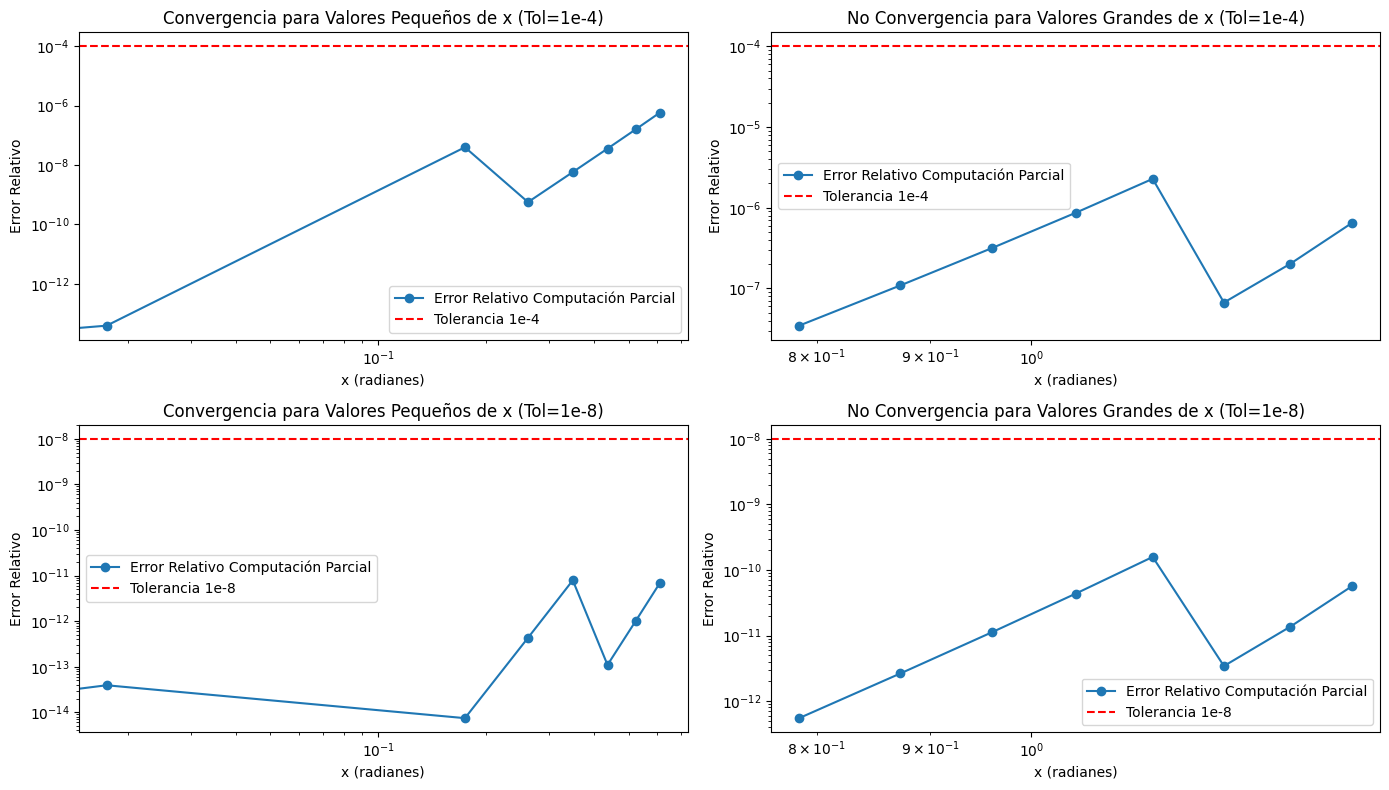

Comparación con Tolerancia 10^-4

Valores pequeños de radianes:
   x (radianes)  Suma Serie Directa  Error Relativo Serie Directa  \
0      0.000000            1.000000                  0.000000e+00   
1      0.017453            0.999848                  1.110392e-16   
2      0.174533            0.984808                  1.127350e-16   
3      0.261799            0.965926                  1.149387e-16   
4      0.349066            0.939693                  1.181475e-16   
5      0.436332            0.906308                  0.000000e+00   
6      0.523599            0.866025                  1.281975e-16   
7      0.610865            0.819152                  0.000000e+00   

   Suma Computación Parcial  Error Relativo Computación Parcial  
0                  1.000000                        0.000000e+00  
1                  0.999848                        3.919684e-14  
2                  0.984808                        3.984227e-08  
3                  0.965926                       

In [ ]:
import math
import pandas as pd
import matplotlib.pyplot as plt
def cos_direct_series(x, N):
    term = 1
    suma = term
    for i in range(1, N):
        term *= -x**2 / ((2*i)*(2*i-1))
        suma += term
    return suma

def cos_partial_computation(x, tol=1e-4):
    term = 1
    suma = term
    i = 0
    while abs(term) > tol:
        i += 1
        term *= -x**2 / ((2*i)*(2*i-1))
        suma += term
    return suma, i

def compare_convergence(x_values, tol=1e-4, N=4):
    resultados = []

    for x in x_values:
        cos_real = math.cos(x)

        # Serie Directa
        suma_directa = cos_direct_series(x, N)
        error_relativo_directa = abs(suma_directa - cos_real) / abs(cos_real)

        # Computación Parcial
        suma_parcial, _ = cos_partial_computation(x, tol)  # No usar el número de iteraciones
        error_relativo_parcial = abs(suma_parcial - cos_real) / abs(cos_real)

        resultados.append({
            "x (radianes)": x,
            "Suma Serie Directa": suma_directa,
            "Error Relativo Serie Directa": error_relativo_directa,
            "Suma Computación Parcial": suma_parcial,
            "Error Relativo Computación Parcial": error_relativo_parcial
        })

    return pd.DataFrame(resultados)

# Valores de x para probar (en grados y radianes)
x_values_small_degrees = [0, 1, 10, 15,20,25,30,35]
x_values_large_degrees = [45, 50, 55, 60,65,70,75,80]

# Convertir a radianes
x_values_small_radians = [math.radians(degree) for degree in x_values_small_degrees]
x_values_large_radians = [math.radians(degree) for degree in x_values_large_degrees]

# Comparación con tolerancia 10^-4
tabla_small_radians_4 = compare_convergence(x_values_small_radians, tol=1e-4, N=10)
tabla_large_radians_4 = compare_convergence(x_values_large_radians, tol=1e-4, N=10)

# Comparación con tolerancia 10^-8
tabla_small_radians_8 = compare_convergence(x_values_small_radians, tol=1e-8, N=20)
tabla_large_radians_8 = compare_convergence(x_values_large_radians, tol=1e-8, N=20)

# Graficar
plt.figure(figsize=(14, 8))

# Error Relativo para valores pequeños de x con tolerancia 10^-4
plt.subplot(2, 2, 1)
plt.plot(tabla_small_radians_4["x (radianes)"], tabla_small_radians_4["Error Relativo Computación Parcial"], 'o-', label='Error Relativo Computación Parcial')
plt.axhline(y=1e-4, color='r', linestyle='--', label='Tolerancia 1e-4')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('x (radianes)')
plt.ylabel('Error Relativo')
plt.title('Convergencia para Valores Pequeños de x (Tol=1e-4)')
plt.legend()

# Error Relativo para valores grandes de x con tolerancia 10^-4
plt.subplot(2, 2, 2)
plt.plot(tabla_large_radians_4["x (radianes)"], tabla_large_radians_4["Error Relativo Computación Parcial"], 'o-', label='Error Relativo Computación Parcial')
plt.axhline(y=1e-4, color='r', linestyle='--', label='Tolerancia 1e-4')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('x (radianes)')
plt.ylabel('Error Relativo')
plt.title('No Convergencia para Valores Grandes de x (Tol=1e-4)')
plt.legend()

# Error Relativo para valores pequeños de x con tolerancia 10^-8
plt.subplot(2, 2, 3)
plt.plot(tabla_small_radians_8["x (radianes)"], tabla_small_radians_8["Error Relativo Computación Parcial"], 'o-', label='Error Relativo Computación Parcial')
plt.axhline(y=1e-8, color='r', linestyle='--', label='Tolerancia 1e-8')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('x (radianes)')
plt.ylabel('Error Relativo')
plt.title('Convergencia para Valores Pequeños de x (Tol=1e-8)')
plt.legend()

# Error Relativo para valores grandes de x con tolerancia 10^-8
plt.subplot(2, 2, 4)
plt.plot(tabla_large_radians_8["x (radianes)"], tabla_large_radians_8["Error Relativo Computación Parcial"], 'o-', label='Error Relativo Computación Parcial')
plt.axhline(y=1e-8, color='r', linestyle='--', label='Tolerancia 1e-8')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('x (radianes)')
plt.ylabel('Error Relativo')
plt.title('No Convergencia para Valores Grandes de x (Tol=1e-8)')
plt.legend()

plt.tight_layout()
plt.show()

print("Comparación con Tolerancia 10^-4")
print("\nValores pequeños de radianes:")
print(tabla_small_radians_4)
print("\nValores grandes de radianes:")
print(tabla_large_radians_4)


print("\nComparación con Tolerancia 10^-8")
print("\nValores pequeños de radianes:")
print(tabla_small_radians_8)
print("\nValores grandes de radianes:")
print(tabla_large_radians_8)



# Datos de estrellas

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


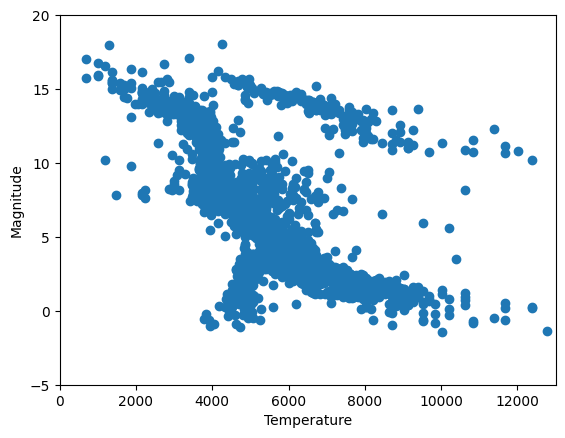

In [8]:
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np


drive.mount('/content/drive')


star = '/content/drive/My Drive/SSF/khctyci.txt'


data = np.loadtxt(star, delimiter=' ')


x = data[:, 0]
y = data[:, 1]


plt.scatter(x, y)
plt.xlabel("Temperature")
plt.ylabel("Magnitude")
plt.xlim(0, 13000)
plt.ylim(-5, 20)
plt.show()
